In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt('/Users/usuario-mac/Desktop/CLASES/2021-2/Logica/Codigos_Clase/Analisis_Datos/501/datosIMC.txt')

#print(data)

In [6]:
peso=data[:,0]
altura=data[:,1]
genero=np.int_(data[:,2])
edad=np.int_(data[:,3])
ID=np.arange(0,len(genero))

#print(len(edad))
#print(len(ID),ID)
print(genero)

[1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1
 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0]


In [4]:
print(np.mean(peso),np.std(peso))
print(np.mean(altura),np.std(altura))
print(min(altura),max(altura))

60.609189189189195 15.92112897979394
3.108756756756757 11.695055877073
1.09 103.0


In [13]:
mujeres0= genero==0
hombres0=genero==1

mujeres=genero[mujeres0]
hombres=genero[hombres0]
print(mujeres)
print(ID[hombres0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   1   4   5   7   8  13  14  16  22  24  25  28  29  30  33  34  36
  38  40  42  47  48  50  52  60  61  64  65  66  67  69  70  74  76  78
  79  87  90  92  93  96  97 103 104 108 110 112 114 116 119 122 123 125
 130 135 137 143 145 146 148 151 156 157 161 162 163 165 169 170 172 174
 176 182]


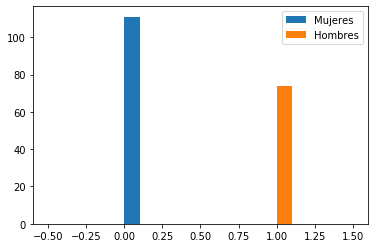

In [18]:
plt.hist(mujeres,label='Mujeres')
plt.hist(hombres,label='Hombres')
plt.legend()
plt.savefig('./figura1.png')

In [20]:
#clasificar niños de adultos ya que el IMC para niños-adolecentes es diferente al de los adultos
#niños-adolecentes=2-19 años

ninos0=edad<=19
adultos0=edad > 19

adultos=edad[adultos0]
ninos=edad[ninos0]


print(len(adultos),len(ninos))

129 56


In [26]:
#discriminar entre hombres, mujeres, niños, niñas

ninas0=(edad<=19) & (genero==0)
ninas=ninas0[ninas0]

ninos0=(edad<=19) & (genero==1)
ninosH=ninos0[ninos0]

print(len(ninas),len(ninosH))

38 18


In [31]:
mujereA0=(edad > 19) & (genero==0)
mujerA=mujereA0[mujereA0]


hombreA0=(edad > 19) & (genero==1)
hombreA=hombreA0[hombreA0]

print(len(mujerA),len(hombreA))

73 56


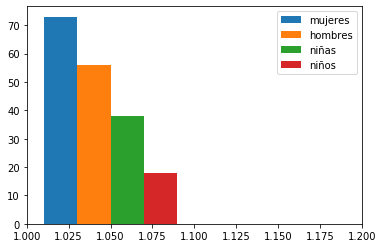

In [36]:
plt.hist([mujerA,hombreA,ninas,ninosH],label=['mujeres','hombres','niñas','niños'] )
plt.xlim(1.0,1.2)
plt.legend()
plt.savefig('histo2.pdf')

In [52]:
#IMC Hombres
#hombreA0=(edad > 19) & (genero==1)

pesoH=peso[hombreA0]
alturaH=altura[hombreA0]
edadH=edad[hombreA0]
IDH=ID[hombreA0]

print(np.mean(pesoH),np.std(pesoH))
print(np.mean(alturaH),np.std(alturaH))
print(np.mean(edadH),np.std(edadH))

72.92857142857143 10.404080832018929
1.7108928571428572 0.06339436617922219
36.535714285714285 12.317183533749981


In [61]:
IMCH=pesoH/(alturaH)**2
print(np.mean(IMCH),np.std(IMCH))
#clasificación

#Desnutricion
desnutricionH=(IMCH< 20)
#print(IMCH[desnutricionH],edadH[desnutricionH],IDH[desnutricionH],alturaH[desnutricionH])
print('ojo, adulto en desnutrición', len(IMCH[desnutricionH]),edadH[desnutricionH])

#Normal
normalH= (IMCH>=20) & (IMCH<=24.9)
print('Felicitaciones, Buenos hábitos', len(IMCH[normalH]))#,edadH[normalH])

#Sobre Peso
sobreP=(IMCH>=25) & (IMCH<=29.9)
print('Cuidado, Sobre Peso', len(IMCH[sobreP]))

#obesidad
obesidad=(IMCH>=30) & (IMCH<=40)
print('ojo, Obesidad', len(IMCH[obesidad]))

#Obesidad Grave
obesidad_G=(IMCH>40)
print('ojo, Obesidad Grave', len(IMCH[obesidad_G]))

24.944492004346444 3.6040181343323368
ojo, adulto en desnutrición 3 [23 23 21]
Felicitaciones, Buenos hábitos 26
Cuidado, Sobre Peso 22
ojo, Obesidad 3
ojo, Obesidad Grave 0


Text(0, 0.5, 'IMC Hombres Adultos')

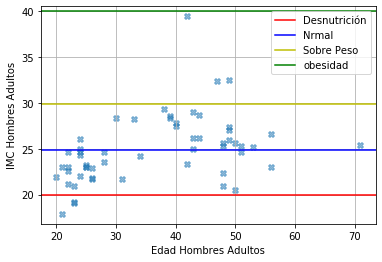

In [83]:
plt.scatter(edadH,IMCH,alpha=0.5,marker='X')
plt.grid()
plt.axhline(y=20,color='r',linestyle='-',label='Desnutrición')
plt.axhline(y=24.9,color='b',linestyle='-',label='Nrmal')
plt.axhline(y=29.9,color='y',linestyle='-',label='Sobre Peso')
plt.axhline(y=40,color='g',linestyle='-',label='obesidad')
plt.legend()
plt.xlabel('Edad Hombres Adultos')
plt.ylabel('IMC Hombres Adultos')

In [84]:
#IMC Mujeres
#mujereA0=(edad > 19) & (genero==0)

pesoM=peso[mujereA0]
alturaM=altura[mujereA0]
edadM=edad[mujereA0]
IDM=ID[mujereA0]

print(np.mean(pesoM),np.std(pesoM))
print(np.mean(alturaM),np.std(alturaM))
print(np.mean(edadM),np.std(edadM))

59.92739726027397 9.495857211681841
1.5857534246575342 0.06529003381580514
40.43835616438356 14.28380278340956


In [92]:
IMCM=pesoM/(alturaM)**2


#clasificación

#Desnutricion
desnutricionM=(IMCM< 19)
#print(IMCM[desnutricionM],edadM[desnutricionM],IDM[desnutricionM],alturaM[desnutricionM])
print('ojo, adulto en desnutrición', len(IMCM[desnutricionM]),edadM[desnutricionM])

#Normal
normalM= (IMCM>=19) & (IMCM<=23.9)
print('Felicitaciones, buenos habitos de nutricion', len(IMCM[normalM]))

#sobre peso
sobreP_M=(IMCM>=24) & (IMCM<=27)
print('ojo, sobre peso detectado, hay que cuidarse', len(IMCM[sobreP_M]))

#obesidad
obesidadM=(IMCM>=27) & (IMCM<=32)
print('ojo, Obesidad', len(IMCM[obesidadM]))

#obesidad Grave
obesidad_GM=(IMCM>32)
print('ojo, Obesidad Grave', len(IMCM[obesidad_GM]))

ojo, adulto en desnutrición 5 [21 75 24 20 20]
Felicitaciones, buenos habitos de nutricion 37
ojo, sobre peso detectado, hay que cuidarse 18
ojo, Obesidad 10
ojo, Obesidad Grave 3


Text(0, 0.5, 'IMC Hombres Adultos')

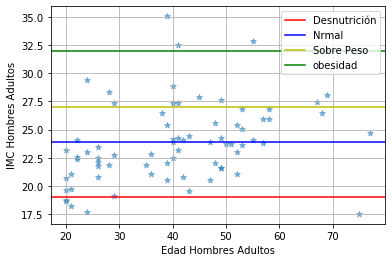

In [93]:
plt.scatter(edadM,IMCM,alpha=0.5,marker='*')
plt.grid()
plt.axhline(y=19,color='r',linestyle='-',label='Desnutrición')
plt.axhline(y=23.9,color='b',linestyle='-',label='Nrmal')
plt.axhline(y=27,color='y',linestyle='-',label='Sobre Peso')
plt.axhline(y=32,color='g',linestyle='-',label='obesidad')
plt.legend()
plt.xlabel('Edad Hombres Adultos')
plt.ylabel('IMC Hombres Adultos')

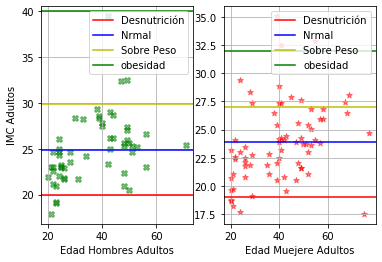

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2)

#hombres ax1
ax1.scatter(edadH,IMCH,alpha=0.5,marker='X',color='g')
ax1.grid()
ax1.axhline(y=20,color='r',linestyle='-',label='Desnutrición')
ax1.axhline(y=24.9,color='b',linestyle='-',label='Nrmal')
ax1.axhline(y=29.9,color='y',linestyle='-',label='Sobre Peso')
ax1.axhline(y=40,color='g',linestyle='-',label='obesidad')
ax1.legend()
ax1.set_xlabel('Edad Hombres Adultos')
ax1.set_ylabel('IMC Adultos')

#Mujeres ax2

ax2.scatter(edadM,IMCM,alpha=0.5,marker='*',color='r')
ax2.grid()
ax2.axhline(y=19,color='r',linestyle='-',label='Desnutrición')
ax2.axhline(y=23.9,color='b',linestyle='-',label='Nrmal')
ax2.axhline(y=27,color='y',linestyle='-',label='Sobre Peso')
ax2.axhline(y=32,color='g',linestyle='-',label='obesidad')
ax2.legend()
ax2.set_xlabel('Edad Muejere Adultos')
#ax2.set_ylabel('IMC Mujeres Adultos')
plt.savefig('./figura3.pdf')
